###  Programming Asst. 01
### K.Surya Prakash
### EE18btech11026

In [3]:
## imports here!!
import numpy as np
import random
import matplotlib.pyplot as plt
import cmath

## 3.1

In [4]:
def generate_exp(N,mu):
    
    u =  np.random.rand(int(N))     ### gerating N uniform distributed RVs

    e = mu * np.log( (1) /(1- u) )
    return e

In [5]:
### This code is to find the probability that |sample_mean - actual_mean| < 0.01 actual_mean
### N = 1e6 is the best.

print("ACTUAL MEAN  =  2\n")

for i in range(7):
    S_1 = generate_exp(pow(10,i),2)
    #print(S_1)
    print('N = %d, estimated mean of the samples : %.2f'%(pow(10,i),np.mean(S_1)))

ACTUAL MEAN  =  2

N = 1, estimated mean of the samples : 0.37
N = 10, estimated mean of the samples : 1.37
N = 100, estimated mean of the samples : 2.09
N = 1000, estimated mean of the samples : 2.01
N = 10000, estimated mean of the samples : 1.97
N = 100000, estimated mean of the samples : 2.01
N = 1000000, estimated mean of the samples : 2.00


## 3.2


### 3.2.c

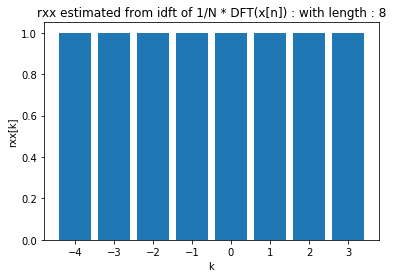

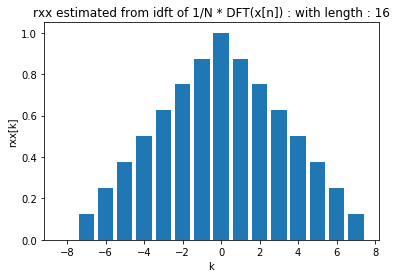

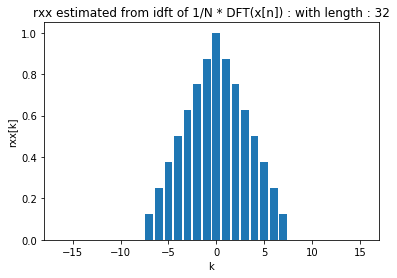

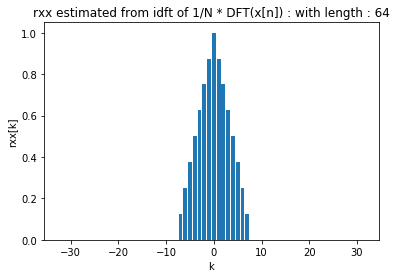

<Figure size 432x288 with 0 Axes>

In [26]:
############## Plotting ACS using different DFTs
x = np.ones(8)
N = len(x)
acs = (1/N)*np.correlate(x,x,"full")

length = [8,16,32,64]

for p in length:


    x_dft = (abs(np.fft.fft(x,p))**2)
    acs_cap = (1/N)*abs(np.fft.ifft(x_dft,p))


    acs_pos = acs_cap[0:int(p/2)]
    acs_neg = acs_cap[int(p/2):p]

    acs_ordered = np.append(acs_neg,acs_pos)
    k = np.arange(-1*int(p/2),int(p/2))

    plt.bar(k,acs_ordered)
    plt.title('rxx estimated from idft of 1/N * DFT(x[n]) : with length : %d'%p)
    plt.xlabel('k')
    plt.ylabel('rxx[k]')
    plt.figure()

### 3.3 

The energy of ACS with 100 lags is 1.26


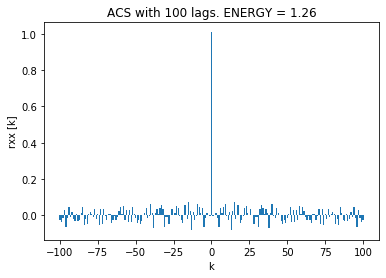

In [12]:
### Thousand samples of gausiiam noise with mean 0, var : 1
N = 1000
x = np.random.normal(0,1,N)
acs = (1/N) *np.correlate(x,x,"full")


####### Plotting 100 lag points
sub_acs = acs[N - 101: N + 100]
sub_k = np.linspace(-100,100,201)
energy = np.sum(sub_acs**2)
plt.bar(sub_k,sub_acs)
plt.title('ACS with 100 lags. ENERGY = %.2f' %energy)
plt.ylabel('rxx [k]')
plt.xlabel('k')


######## Calculting energy of sub_acs

print('The energy of ACS with 100 lags is %.2f'%energy)

The energy of ACS(by averaging ACS of chunks) with 100 lags is 1.16


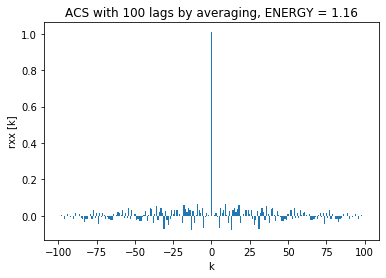

In [13]:
##### Averaging over acs of chunks of data

acs_avg = np.zeros(199)
for i in range(10):
    x_chunk = x[i*100:(i+1)*100]
    n = 100
    acs_chunk =  (1/n)*np.correlate(x_chunk,x_chunk,"full")
    acs_avg = acs_avg + acs_chunk
acs_avg = (1/10)*acs_avg

sub_k = np.linspace(-99,99,199)
plt.bar(sub_k,acs_avg)
energy = np.sum(acs_avg**2)
plt.title('ACS with 100 lags by averaging, ENERGY = %.2f'%(energy))
plt.ylabel('rxx [k]')
plt.xlabel('k')



######## Calculting energy of sub_acs
energy = np.sum(acs_avg**2)
print('The energy of ACS(by averaging ACS of chunks) with 100 lags is %.2f'%energy)

The energy of ACS(by averaging ACS of chunks) with 100 lags is 1.047


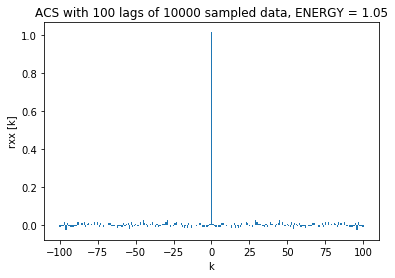

In [16]:
################ Considering N = 10000
N = 10000
x = np.random.normal(0,1,N)
acs = (1/N) *np.correlate(x,x,"full")



####### Plotting 100 lag points
sub_acs = acs[N - 101:N+100]
sub_k = np.linspace(-100,100,201)
energy = np.sum(sub_acs**2)
plt.bar(sub_k,sub_acs)
plt.title('ACS with 100 lags of 10000 sampled data, ENERGY = %.2f'%energy)
plt.ylabel('rxx [k]')
plt.xlabel('k')

######## Calculting energy of 100 lags
energy = np.sum(sub_acs**2)
print('The energy of ACS(by averaging ACS of chunks) with 100 lags is %.3f'%energy)

### 3.4 

In [21]:
#########################################
####   Probl 3.4.a
#########################################

## generating 24 samples of x

def generate_x(samples,a1 = 0,a2 = -0.81,b0 = 1):   ### def to genreate samples  = no, of required samples
    
    N = 100000
    X = np.zeros(N)

    v = np.random.normal(0,1,N)

    X[0],X[1] = v[0],v[1]

    for i in range(2,N):
        X[i] = a1* X[i-1] + a2* X[i-2] + b0* v[i]  ### abiding the eqn
    
    x = X[5000:5000+samples]
    return x

#### generating 24 samples : picking them from last 

print('The samples are :')
x_24 = generate_x(24)
print(x_24)


The samples are :
[ 0.82355407 -1.67630795  0.30547476  1.21783704 -0.41054998 -2.37505211
 -0.74461875  3.0471861   0.25480514 -2.56775009 -1.83112222  2.47428224
  3.02154112 -1.81143081 -3.67761063  0.84866679  2.5407112  -1.65250845
 -1.72939164 -0.50322277  1.90788215 -0.43908122 -0.00821371  2.5590426 ]


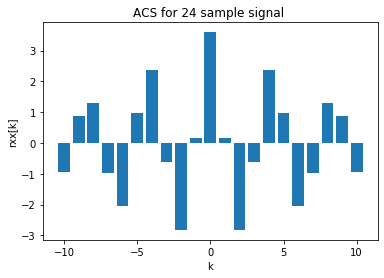

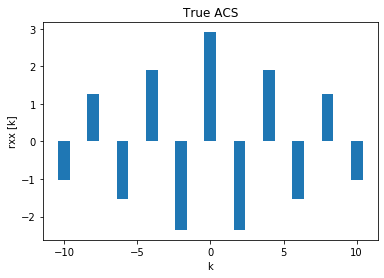

In [22]:
#########################################
####   Probl 3.4.b
#########################################

## Estimating ACS with sample autocorelation.
def estimate_ACS(x,k_max = 10,plot = True):
    N = len(x)
    acs_x = (1/N)*np.correlate(x,x,"full")   ## estimating using corelation fn.
    k = np.linspace(-1*k_max,k_max,2*k_max+1)
    sub_acs = acs_x[N - k_max-1:N+k_max]
    acs_pos = sub_acs[k_max :]
    if(plot):
        plt.bar(k,sub_acs)
        plt.xlabel('k')
        plt.ylabel('rxx[k]')
        plt.title('ACS for %d sample signal ' %N)
        plt.figure()
    return acs_x,acs_pos
    
    
################### True ACS : 

def plot_true_ACS(k_max = 10):
    a = -0.81
    K = np.linspace(-1*k_max,k_max,2*k_max+1)

    rxx_true = np.zeros(len(K))
    for i in range(len(K)):
        k = K[i]
        if(k%2==0):
            rxx_true[i] = pow(a,abs(k/2) ) *(1/(1- (a**2)  ))
        else:
            rxx_true[i] = 0
    plt.bar(K,rxx_true)
    plt.xlabel('k')
    plt.ylabel('rxx [k]')
    plt.title('True ACS')
#########################################   IMPLEMENTATIONS...
rxx_24,rxx_pos = estimate_ACS(x_24)
plot_true_ACS()




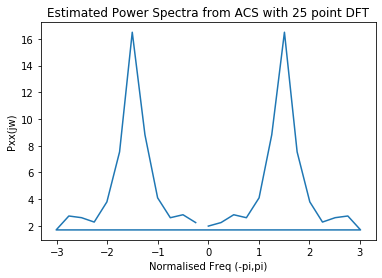

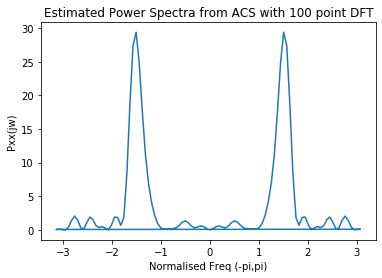

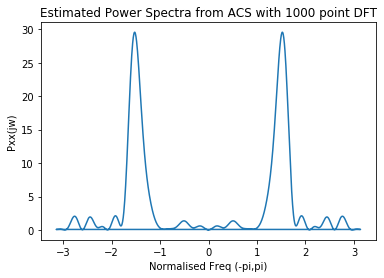

<Figure size 432x288 with 0 Axes>

In [25]:
#########################################
####   Probl 3.4.c
#########################################

def estimate_power_spectrum(rxx,pt):
    
    fft = (abs(np.fft.fft(rxx,pt)))
    fft_freq = np.fft.fftfreq(pt) * (2*np.pi)
    plt.plot(fft_freq,fft)
    plt.xlabel('Normalised Freq (-pi,pi)')
    plt.ylabel('Pxx(jw)')
    plt.title('Estimated Power Spectra from ACS with %d point DFT'%pt)
    plt.figure()

estimate_power_spectrum(rxx_24,25)
estimate_power_spectrum(rxx_24,100)
estimate_power_spectrum(rxx_24,1000)

In [146]:
#########################################
####   Probl 3.4.d
#########################################

#### Yule Walkler Equations :
def estimate_codff(rxx,N,var=1):   ### input rxx and variance of white noise
    R = [[rxx[0],rxx[1]],[rxx[1],rxx[0]]]
    r_s = [[rxx[1]],[rxx[2]]]
    a_final = np.linalg.inv(R)@r_s
    
    a1,a2 = a_final[0],a_final[1]
    
    b = (1/var)*(rxx[0]*1 - rxx[1]*a1 - rxx[2]*a2)
    
    print('The estimates for %d sampled data are : a1 = %.2f, a2 = %.2f, b0 = %.2f' %(N,a1,a2,b))
    return [a1,a2,b]




x_24 =  generate_x(24)
x_100 = generate_x(100)
x_300 = generate_x(300)
x_1000 = generate_x(1000)

_,rxx_pos_24 = estimate_ACS(x_24,plot = False)
_,rxx_pos_100 = estimate_ACS(x_100,plot = False)
_,rxx_pos_300 = estimate_ACS(x_300,plot = False)
_,rxx_pos_1000 = estimate_ACS(x_1000,plot = False)



e24 = estimate_codff(rxx_pos_24,24)
e100 =estimate_codff(rxx_pos_100,100)
e300 =estimate_codff(rxx_pos_300,300)
e1000 =estimate_codff(rxx_pos_1000,1000)


The estimates for 24 sampled data are : a1 = -0.11, a2 = -0.81, b0 = 1.35
The estimates for 100 sampled data are : a1 = 0.01, a2 = -0.79, b0 = 1.00
The estimates for 300 sampled data are : a1 = 0.01, a2 = -0.79, b0 = 0.92
The estimates for 1000 sampled data are : a1 = -0.01, a2 = -0.81, b0 = 1.04


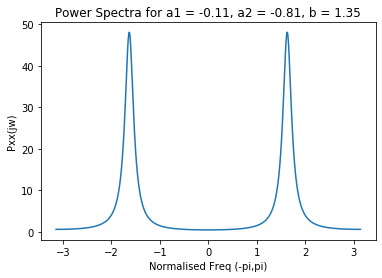

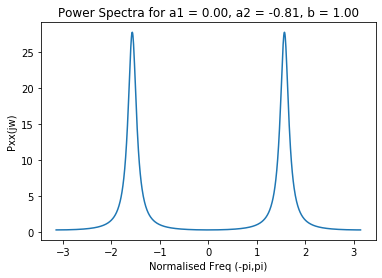

<Figure size 432x288 with 0 Axes>

In [147]:
#########################################
####   Probl 3.4.e
#########################################

## Power Spectrum estimation from estimated coeddicients ..

def plot_power_s(estimates):
    a1,a2,b = estimates
    W = np.linspace(-np.pi,np.pi,1000)
    P = np.array([ (abs((b)/ (1 - cmath.rect(a1,-1*w) - cmath.rect(a2,-2*w)) ))**2    for w in W])
    plt.plot(W,P)
    plt.title('Power Spectra for a1 = %.2f, a2 = %.2f, b = %.2f' %(a1,a2,b))
    plt.xlabel('Normalised Freq (-pi,pi)')
    plt.ylabel('Pxx(jw)')
    plt.figure()
    
######################### e24 is estimates for 24 sample data
######################## true estimates is [0,-0.81,1]
true_estimates = [0,-0.81,1]
plot_power_s(e24)
plot_power_s(true_estimates)

# THE END